# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

- 분석의 목적 확인
- 데이터 타입 확인하기
- 결측값 확인하기
- 데이터 분포 확인
- 관계 분석하기

<div class="alert alert-block alert-danger">
    <b>목표</b> : 생존률과 관련 있는 Factor를 찾는다. 
</div>

타이타닉 CSV 데이터를 데이터프레임으로 읽어옵니다. 
- `train.csv`

In [56]:
import pandas as pd

In [41]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- `SibSp` : 형제 자매와 배우자
- `Parch` : 부모와 자식
- `Cabin` : 선실 번호  
- `Embarked` : 탑승 항구(C = Cherbourg, Q = Queenstown, S = Southampton)

단순히 상관관계만을 참고한다면 성별과 클래스가 생존률과 높은 관계가 있다고 결론 내릴 수 있습니다.
- `Survived` 행에서 높은 값을 갖는 두 변수

In [113]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


## 데이터 타입과 결측값 확인하기

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


결측값 개수 출력하기

In [52]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측비율 출력하기

In [55]:
df.isna().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

나이는 평균으로 채우기
- 전체 평균이 정답인가?
- Pclass가 같은 사람들의 평균이 좋지 않을까?

불필요한 컬럼 제거하기

In [83]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [81]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [85]:
df = df[  ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']  ]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 데이터 분포 확인하기

중복되지 않는 값 

In [94]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [95]:
df['Survived'].nunique()

2

###### 성별
생존률의 차이가 있지 않을까?

In [96]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [103]:
import numpy as np

how = {
    'Survived': np.mean
}

df.groupby('Sex').agg( how ) * 100

,Survived
Sex,
female,74.203822
male,18.890815


성별은 생존률에 영향을 미친다.  

----

분석하기 좋게 남자를 0, 여자를 1로 변경해 봅시다.

In [105]:
def convert(x):
    if x == "male":
        return 0
    else:
        return 1
    
df['Sex'].map( convert )

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [108]:
df['Sex'] = df['Sex'].map( convert )
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


`get_dummies` 함수는 0과 1로 이루어진 가변수를 만듭니다. 
- One-hot encoding이라고도 부릅니다.

In [106]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


하나의 예제를 더 확인해 보면서 `get_dummies`를 익혀봅시다.

In [116]:
data = {
    "항목" : ["A", "B", "C", "A"],
    "가격" : [100, 200, 150, 300]
}
t = pd.DataFrame(data)
t

,항목,가격
0,A,100
1,B,200
2,C,150
3,A,300


In [117]:
pd.get_dummies(t['항목'])

,A,B,C
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


###### 형제/자매와 와이프
보호자인 경우 생존률이 높지 않을까?

In [118]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

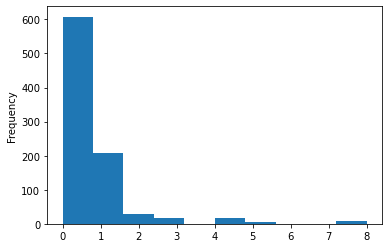

In [120]:
df['SibSp'].plot.hist()

0을 제외하고 분포 확인하기

<AxesSubplot:ylabel='Frequency'>

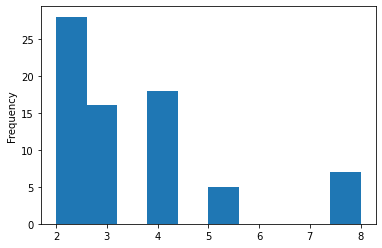

In [124]:
df.loc[  df['SibSp'] > 1, 'SibSp' ].plot.hist()

시각화를 하는 `seaborn` 모듈
- https://seaborn.pydata.org/tutorial.html#

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

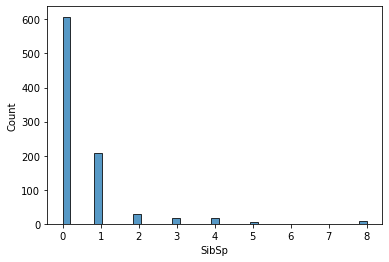

In [143]:
import seaborn as sns
sns.histplot(x='SibSp', data=df)

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

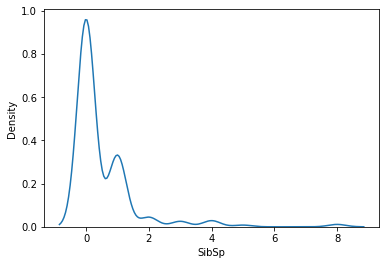

In [144]:
sns.kdeplot(x='SibSp', data=df)

평균은?

In [127]:
df['SibSp'].mean()

0.5230078563411896

형제/자매 및 와이프가 있는 경우의 평균

In [91]:
df.loc[  df['SibSp'] > 0, 'SibSp' ].mean()

1.646643109540636

요약 정보 확인하기

In [125]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

없음/보통/많음으로 구분하기

In [134]:
def sibsp(x):
    if x == 0:
        return "없음"
    elif x == 1:
        return "보통"
    else:
        return "많음"

df['SibSp1'] = df['SibSp'].map( sibsp )
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp1
0,0,3,0,22.0,1,0,7.2500,S,보통
1,1,1,1,38.0,1,0,71.2833,C,보통
2,1,3,1,26.0,0,0,7.9250,S,없음
3,1,1,1,35.0,1,0,53.1000,S,보통
4,0,3,0,35.0,0,0,8.0500,S,없음


구분에 따른 생존률 분석

In [136]:
how = {
    'Survived':np.mean
}

df.groupby('SibSp1').agg(how)

,Survived
SibSp1,
많음,0.270270
보통,0.535885
없음,0.345395


###### 부모 및 아이

In [64]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

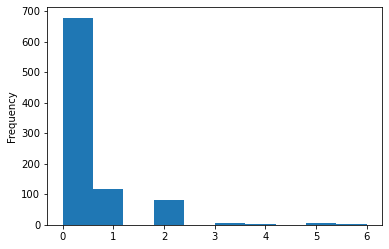

In [137]:
df['Parch'].plot.hist()

보호자는 생존률이 높지 않을까?

<AxesSubplot:ylabel='Frequency'>

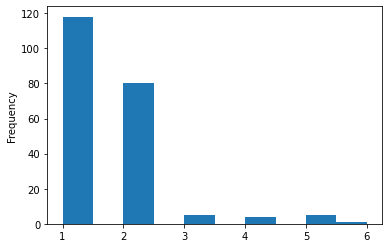

In [145]:
df.loc[  df['Parch'] > 0, 'Parch' ].plot.hist()

`없음`/`보통`/`많음`으로 분류하기

In [149]:
def parch(x):
    if x == 0:
        return "없음"
    elif x < 3:
        return "보통"
    else:
        return "많음"
    
df['Parch1'] = df['Parch'].map(   parch   )
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp1,Parch1
0,0,3,0,22.0,1,0,7.2500,S,보통,없음
1,1,1,1,38.0,1,0,71.2833,C,보통,없음
2,1,3,1,26.0,0,0,7.9250,S,없음,없음
3,1,1,1,35.0,1,0,53.1000,S,보통,없음
4,0,3,0,35.0,0,0,8.0500,S,없음,없음


In [150]:
df.groupby('Parch1').agg(how)

,Survived
Parch1,
많음,0.266667
보통,0.530303
없음,0.343658


## 나이 

<AxesSubplot:ylabel='Frequency'>

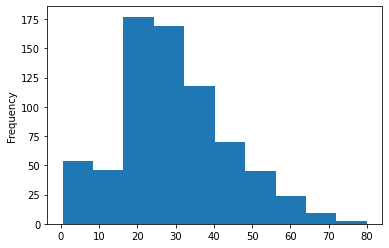

In [151]:
df['Age'].plot.hist()

In [153]:
def age(x):
    if x < 10:
        return "유아"
    elif x < 20:
        return "청소년"
    elif x < 50:
        return "성인"
    else:
        return "노약자"

df['Age1'] = df['Age'].map( age )
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp1,Parch1,Age1
0,0,3,0,22.0,1,0,7.2500,S,보통,없음,성인
1,1,1,1,38.0,1,0,71.2833,C,보통,없음,성인
2,1,3,1,26.0,0,0,7.9250,S,없음,없음,성인
3,1,1,1,35.0,1,0,53.1000,S,보통,없음,성인
4,0,3,0,35.0,0,0,8.0500,S,없음,없음,성인


In [154]:
df.groupby('Age1').agg(how)

,Survived
Age1,
노약자,0.314741
성인,0.386555
유아,0.612903
청소년,0.401961


## 다변수 분석

여자 보호자의 생존률은 더 높지 않을까?
- 성별이 여자이면서 `Parch`가 존재

In [155]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp1,Parch1,Age1
0,0,3,0,22.0,1,0,7.2500,S,보통,없음,성인
1,1,1,1,38.0,1,0,71.2833,C,보통,없음,성인
2,1,3,1,26.0,0,0,7.9250,S,없음,없음,성인
3,1,1,1,35.0,1,0,53.1000,S,보통,없음,성인
4,0,3,0,35.0,0,0,8.0500,S,없음,없음,성인


In [157]:
df.groupby(['Sex', 'Parch1']).agg(how)

Survived
Sex Parch1          
0   많음      0.000000
    보통      0.325843
    없음      0.165289
1   많음      0.363636
    보통      0.697248
    없음      0.788660

In [158]:
df.groupby(['Sex', 'SibSp1']).agg(how)

Survived
Sex SibSp1          
0   많음      0.100000
    보통      0.310680
    없음      0.168203
1   많음      0.470588
    보통      0.754717
    없음      0.787356

In [159]:
df.groupby(['Sex', 'Parch1', 'SibSp1']).agg(how)

Survived
Sex Parch1 SibSp1          
0   많음     보통      0.000000
    보통     많음      0.074074
           보통      0.461538
           없음      0.391304
    없음     많음      0.153846
           보통      0.233333
           없음      0.155718
1   많음     많음      1.000000
           보통      0.333333
           없음      0.250000
    보통     많음      0.392857
           보통      0.756757
           없음      0.840909
    없음     많음      0.800000
           보통      0.793651
           없음      0.785714

In [162]:
df.groupby(['Sex', 'Age1']).agg(how)

Survived
Sex Age1          
0   노약자   0.130682
    성인    0.192308
    유아    0.593750
    청소년   0.122807
1   노약자   0.746667
    성인    0.756098
    유아    0.633333
    청소년   0.755556

In [163]:
pd.get_dummies(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,SibSp1_많음,SibSp1_보통,SibSp1_없음,Parch1_많음,Parch1_보통,Parch1_없음,Age1_노약자,Age1_성인,Age1_유아,Age1_청소년
0,0,3,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,0,1,0,1,0,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,1,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,1,0,1,0,0
3,1,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,1,0,1,0,0
4,0,3,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1,0,0,1,0,0,1,0,1,0,0
887,1,1,1,19.0,0,0,30.0000,0,0,1,0,0,1,0,0,1,0,0,0,1
888,0,3,1,NaN,1,2,23.4500,0,0,1,0,1,0,0,1,0,1,0,0,0
889,1,1,0,26.0,0,0,30.0000,1,0,0,0,0,1,0,0,1,0,1,0,0
